In [99]:
import warnings
warnings.filterwarnings('ignore')

## Questão 1.
- Considere os dados do arquivo “ex1data1.txt”.
- Plote os dados em um gráfico (com a biblioteca matplotlib) colocando a primeira coluna dos dados no eixo x e a segunda coluna no eixo y.
- Baseado na visualização obtida, um modelo de regressão linear seria adequado para representar esses dados?
- Para este conjunto de dados, considere a primeira coluna dos dados como o único atributo dos indivíduos (X) e a segunda coluna é o rótulo dos mesmos (y).

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [101]:
dadosEx1 = pd.read_csv('ex1data1.txt', sep=',' , header=None)

In [102]:
x = dadosEx1.iloc[:,0].values.reshape(-1,1) 
y = dadosEx1.iloc[:,1].values.reshape(-1,1)
x_Escalado = MinMaxScaler().fit_transform(x)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado,y, test_size=0.3)

In [104]:
regressaoLinear = LinearRegression()
regressaoLinear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
print("Acurácia Regressão Linear: %.1f %%" %(regressaoLinear.score(x_test, y_test)*100))

Acurácia Regressão Linear: 83.2 %


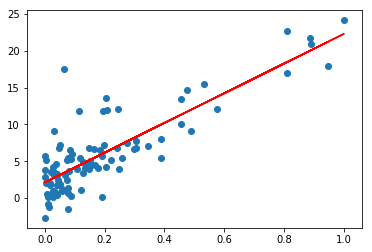

In [106]:
plt.scatter(x_Escalado, y)
plt.plot(x_Escalado, regressaoLinear.predict(x_Escalado), color='red')
plt.show()

## Resposta Questão 1 :
Sim, os dados podem ser representados por uma regressão linear, poiso gráfico demonstra conrrelação linear positiva entre os atributos.

In [107]:
#----------------------------------------------------------------------------------------------------------

## Questão	2. 

- Carregue os dados contidos no arquivo “ex2data1.txt”.

- O arquivo contem 100 linhas e 3 colunas de dados. Cada coluna se
refere a uma variável. Neste problema, deve-se desenvolver um modelo de
classificação capaz de reproduzir as classes apresentadas na terceira coluna
dos dados.

- O problema consiste em um sistema de admissão de alunos em uma
universidade. Os dados das colunas 1 e 2 representam as notas de cada aluno
em dois testes. A coluna 3 indica se este aluno foi ou não admitido na
universidade.

- Os dados apresentados são dados históricos de alunos aceitos ou não.
Deseja-se fazer um sistema que faça a avaliação dos alunos
automaticamente.

- Apresentar: Figura com os dados. Para a figura, utilize um gráfico em
duas dimensões, cada uma contendo uma nota, e diferenciando aprovação e
reprovação pela cor dos dados no gráfico.

- Divida o conjunto de dados entre treino e teste.
- Utilize a Regressão Logística para efetuar a classificação nos dados de
- Treine e calcule a acurácia (score) obtida para o conjunto de teste.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [109]:
dadosEx2 = pd.read_csv('ex2data1.txt', sep=',' ,header=None)

In [110]:
nota1 = dadosEx2.iloc[:,0].values.reshape(-1,1)
nota2 = dadosEx2.iloc[:,1].values.reshape(-1,1)
final = dadosEx2.iloc[:,2].values.reshape(-1,1)

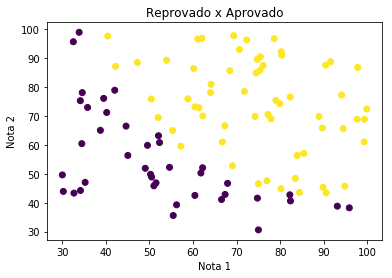

In [111]:
plt.scatter(nota1, nota2, c=final)
plt.xlabel('Nota 1')
plt.ylabel('Nota 2')
plt.title('Reprovado x Aprovado')
plt.show()

In [112]:
x = dadosEx2[[0,1]]
y = final

In [113]:
x_Escalado = MinMaxScaler().fit_transform(x)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado, y)

In [115]:
regressaoLogistica = LogisticRegression()
regressaoLogistica.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
print("Acurácia Regressão Logística: %.1f %%" %(regressaoLogistica.score(x_test, y_test)*100))

Acurácia Regressão Logística: 84.0 %


In [117]:
#-----------------------------------------------------------------------------------------------------------------------------------

## Questão 3.

- Carregue os dados contidos no Dataset de Câncer (breast
cancer) do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do SVM (SVC) para realizar a classificação
dos dados carregados.
- Varie o parâmetro C de 0.1 a 1 e mostre um gráfico contendo a
diferença entre os scores obtidos no conjunto de treino para cada valor
do parâmetro C.
- Varie o parâmetro C de 0.1 a 1 e mostre um gráfico contendo a
diferença entre os scores obtidos no conjunto de teste para cada valor
do parâmetro C.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de C.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [119]:
x, y = load_breast_cancer(return_X_y=True)

In [120]:
x_Escalado = MinMaxScaler().fit_transform(x)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado, y)

In [122]:
list_Train = []
list_Test = []
list_var = []

for c in np.arange(0.1,1,0.1):
    
    svc = SVC(kernel='linear', C=c)
    
    svc.fit(x_train, y_train)
    list_Train.append(svc.score(x_train, y_train))
    
    svc.fit(x_test, y_test)
    list_Test.append(svc.score(x_test, y_test))
    
    list_var.append(c)

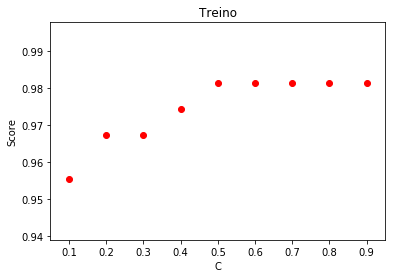

In [123]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

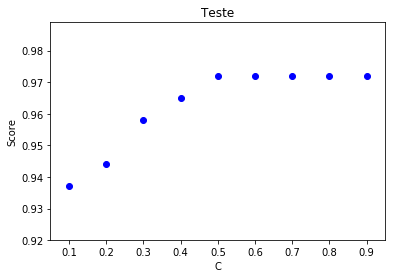

In [124]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

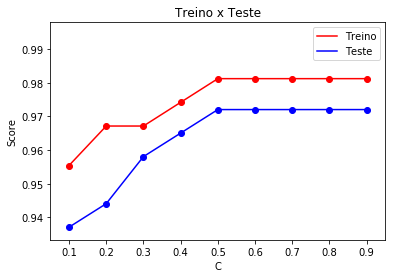

In [125]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

- O Parâmetro C no modelo SVC Define o custo do modelo errar alguns exemplos de treinamento, mas ao aumentar a margem de separação dos dado a acurácia pode aumentar no teste, mesmo que seja menor no treinamento.

In [126]:
#---------------------------------------------------------------------------------------------------------------------------------------------

## Questão 4. 
- Carregue os dados contidos no arquivo
“fruit_data_with_colors_miss.txt”.
- Utilize a estratégia de imputar os dados faltantes utilizando a média
dos demais dados.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do KNN para realizar a classificação dos
dados carregados, com o conjunto de atributos sendo constituído das
colunas “mass”, “width”, “height” e “color_score” e o rótulo sendo
constituído pela coluna “fruit_label”.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de treino
para cada valor do parâmetro.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de teste para
cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_neighbors.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [128]:
fruits = pd.read_table('fruit.txt', sep='\t', na_values=['?','.'])

In [129]:
fruits = fruits.fillna(fruits.mean())

In [130]:
x = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [131]:
x_Escalado = MinMaxScaler().fit_transform(x)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado,y)

In [133]:
list_Train = []
list_Test = []
list_var = []

for n in np.arange(1,10,1):
    
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(x_train, y_train)
    list_Train.append(knn.score(x_train, y_train))
    
    knn.fit(x_test, y_test)
    list_Test.append(knn.score(x_test, y_test))
    
    list_var.append(n)

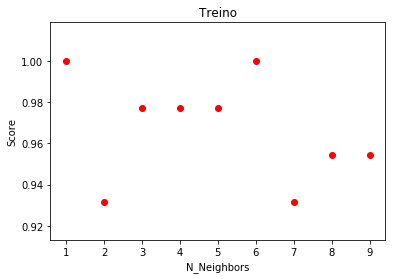

In [134]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

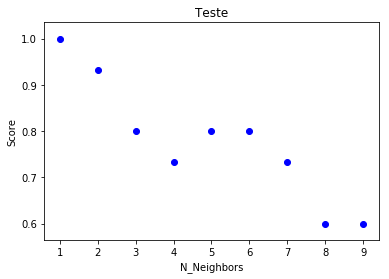

In [135]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

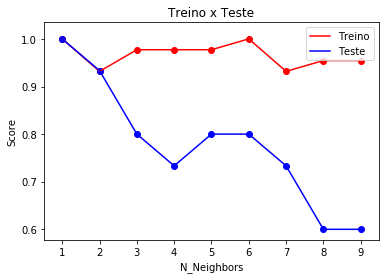

In [136]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

- O Hiperparâmetro N_Neighbors, no Modelo KNN, define a quantidade de vizinhos comparados para a nova classificação, de forma que, a acurácia do modelo KNN é muito impactado por este Hiperparâmetro, onde facilmente pode ocorrer overfitting e dependendo da massa de dados, ao aumentar o valor de N_Neighbors, a acurácia de treino continua alta(Overfitting), mas a de teste decresce, exatamente como demonstrado no gráfico.

In [137]:
#-------------------------------------------------------------------------------------------------------------------------------------------

## Questão 5.
- Carregue os dados contidos no arquivo
“fruit_data_with_colors_miss.txt”.
- Utilize a estratégia de imputar os dados faltantes utilizando a média
dos demais dados.
- Utilize o PCA para diminuir a dimensionalidade dos atributos para
n_components=2
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do KNN para realizar a classificação dos
dados carregados, com o conjunto de atributos sendo constituído pela
saída do PCA sobre as colunas “mass”, “width”, “height” e
“color_score” e o rótulo sendo constituído pela coluna “fruit_label”.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de treino
para cada valor do parâmetro.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de teste para
cada valor do parâmetro.
Justifique as diferenças apresentadas nos gráficos da questão anterior
em relação aos obtidos nesta questão.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [139]:
fruits = pd.read_table('fruit.txt', sep='\t', na_values=['?','.'])

In [140]:
fruits = fruits.fillna(fruits.mean())

In [141]:
x = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

x_Escalado = MinMaxScaler().fit_transform(x)

In [142]:
pca = PCA(n_components=2)
x_Dimensionado = pca.fit_transform(x_Escalado)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_Dimensionado,y)

In [144]:
list_Train = []
list_Test = []
list_var = []

for n in np.arange(1,10,1):
    
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(x_train, y_train)
    list_Train.append(knn.score(x_train, y_train))
    
    knn.fit(x_test, y_test)
    list_Test.append(knn.score(x_test, y_test))
    
    list_var.append(n)

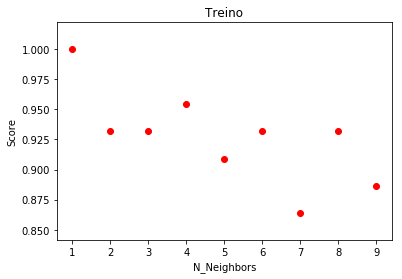

In [145]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

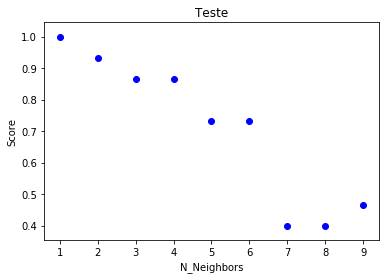

In [146]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

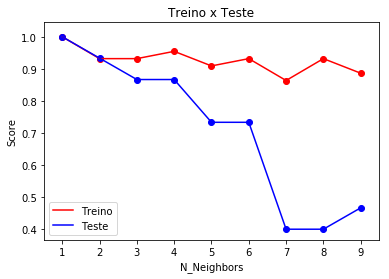

In [147]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

- A utilização do PCA, objetiva diminuir a dimensionalidade do dataset, de forma a diminuir a tendência de overfitting no modelo KNN, já que o mesmo tem melhor acurácia com menos dimensões. O Gráfico vermelho de treino em comparação à questão passada, está demonstrando menos overfitting.

In [148]:
#-------------------------------------------------------------------------------------------------------------------------------------------

## Questão 6. 
- Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize a Random Forest para realizar a classificação dos dados
carregados.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de treino para cada valor do parâmetro n_estimators.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de teste para cada valor do parâmetro n_estimators.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_estimators.
Apresente a matriz de confusão dos dados de teste.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [150]:
x, y = load_iris(return_X_y=True)

In [151]:
x_Escalado = MinMaxScaler().fit_transform(x)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado, y)

In [153]:
list_Train = []
list_Test = []
list_var = []
list_Predict = []

for n in np.arange(1,100,10):
    
    clf = RandomForestClassifier(n_estimators=n)
    
    clf.fit(x_train, y_train)
    list_Train.append(clf.score(x_train, y_train))
    
    clf.fit(x_test, y_test)
    list_Test.append(clf.score(x_test, y_test))
    
    list_Predict.append(clf.predict(x_test))
    
    list_var.append(n)

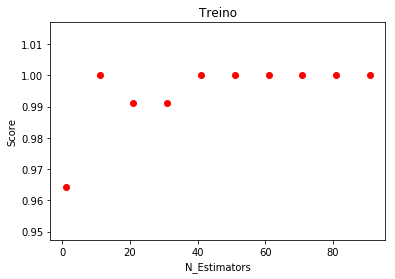

In [154]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

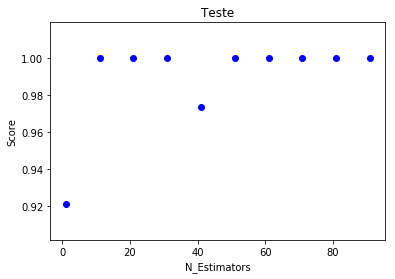

In [155]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

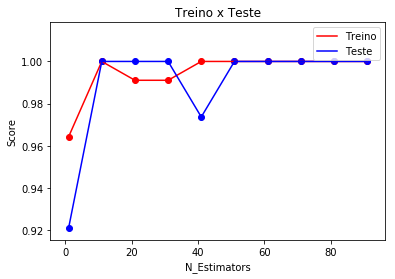

In [156]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

- O Modelo Random Forest, demonstrou melhor acurácia em Teste a partir de 10 N_Estimators, como também pode ser confirmado pela matriz de confusão com 11 N estimadores que tem acurácia superior à matrix com 1 N estimador, sem apresentar falsos positivos ou falsos negativos.

In [157]:
for predict, n in zip(list_Predict, np.arange(1, 100, 10)):
    print('Quantidade de Estimadores N: %s \n' %n, confusion_matrix(y_test, predict), '\n')

Quantidade de Estimadores N: 1 
 [[16  0  0]
 [ 0  8  3]
 [ 0  0 11]] 

Quantidade de Estimadores N: 11 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 21 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 31 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 41 
 [[16  0  0]
 [ 0 11  0]
 [ 0  1 10]] 

Quantidade de Estimadores N: 51 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 61 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 71 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 81 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 

Quantidade de Estimadores N: 91 
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 11]] 



In [158]:
#-------------------------------------------------------------------------------------------------------------------------------------------

## Questão 7. 
- Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize a Gradient Boosted Decision Tree
(GradientBoostingClassifier) para realizar a classificação dos dados
carregados.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de treino para cada valor do parâmetro n_estimators.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de teste para cada valor do parâmetro n_estimators.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_estimators.
Apresente a matriz de confusão dos dados de teste.
Compare os resultados obtidos pela Random Forest e a Gradient
Boosted Decision Tree, considerando acurácia e matriz de confusão,
e diga qual deveria ser utilizada.

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
x, y = load_iris(return_X_y=True)

In [161]:
x_Escalado = MinMaxScaler().fit_transform(x)

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_Escalado, y)

In [163]:
list_Train = []
list_Test = []
list_var = []
list_Predict = []

for n in np.arange(1,100,10):
    
    clf = GradientBoostingClassifier(n_estimators=n)
    
    clf.fit(x_train, y_train)
    list_Train.append(clf.score(x_train, y_train))
    
    clf.fit(x_test, y_test)
    list_Test.append(clf.score(x_test, y_test))
    
    list_Predict.append(clf.predict(x_test))
    
    list_var.append(n)

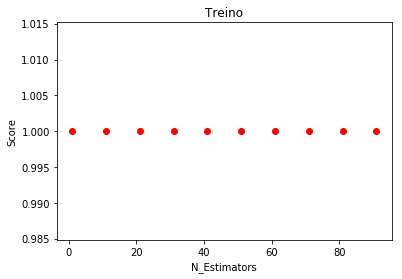

In [164]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

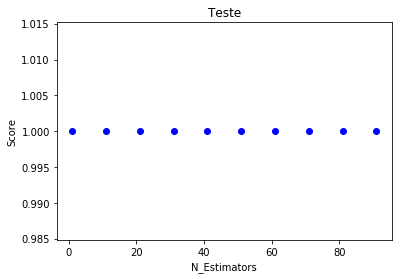

In [165]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

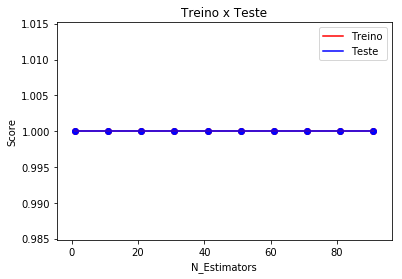

In [166]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('N_Estimators')
plt.ylabel('Score')
plt.show()

- O Modelo GradientBoostingClassifier é mais indicado que o anterior, pois como comprovado pelo gráfico e pela matriz de confusão com 1 N_Estimators, este já tem acurácia superior ao anterior com menos custo computacional, sem apresentar falsos positivos ou falsos negativos.

In [167]:
for predict, n in zip(list_Predict, np.arange(1, 100, 10)):
    print('Quantidade de Estimadores N: %s \n' %n, confusion_matrix(y_test, predict), '\n')

Quantidade de Estimadores N: 1 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 11 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 21 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 31 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 41 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 51 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 61 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 71 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 81 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 

Quantidade de Estimadores N: 91 
 [[11  0  0]
 [ 0 12  0]
 [ 0  0 15]] 



In [168]:
# Justificar Diferenças com questão anterior...

In [169]:
#-------------------------------------------------------------------------------------------------------------------------------------------

## Questão	8. 
- Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador baseado em Redes Neurais (MLPClassifier)
para realizar a classificação dos dados carregados.
- Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e
mostre um gráfico contendo a diferença entre os scores obtidos no
conjunto de treino para cada valor do parâmetro.
- Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e
mostre um gráfico contendo a diferença entre os scores obtidos no
conjunto de teste para cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de hidden_layer_sizes.
Altere o parâmetro learning_rate para ‘adaptive’ e repita os
experimentos realizados mostrando os mesmos gráficos.

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [171]:
x,y = load_iris()['data'], load_iris()['target']

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [173]:
list_Train = []
list_Test = []
list_var = []

for n in np.arange(10,110,10):
    
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(n,))
    
    mlp.fit(x_train, y_train)
    list_Train.append(mlp.score(x_train, y_train))
    
    mlp.fit(x_test, y_test)
    list_Test.append(mlp.score(x_test, y_test))
    
    list_var.append(n)

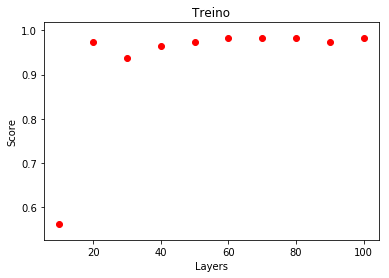

In [174]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

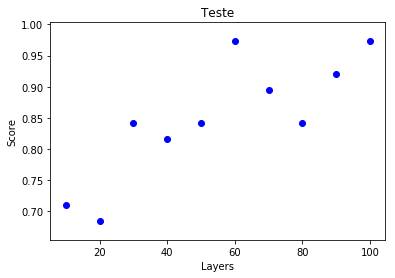

In [175]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

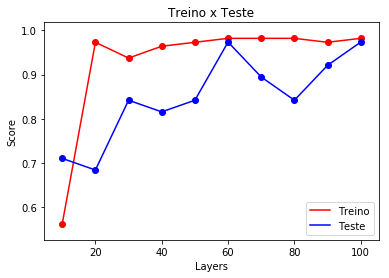

In [176]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

- Com o Modelo MLPClassifier a acurácia em treino já se estnbiliza a partir de 40 Layers com acurácia de teste similar, enquanto a acurácia em teste se torna superior à de treino apenas a partir de 80 Layers, quem tem muito mais custo computacional, portanto não valendo a pena aumentar tanto as camadas.

In [177]:
list_Train = []
list_Test = []
list_var = []

for n in np.arange(10,110,10):
    
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(n,),  learning_rate='adaptive')
    
    mlp.fit(x_train, y_train)
    list_Train.append(mlp.score(x_train, y_train))
    
    mlp.fit(x_test, y_test)
    list_Test.append(mlp.score(x_test, y_test))
    
    list_var.append(n)

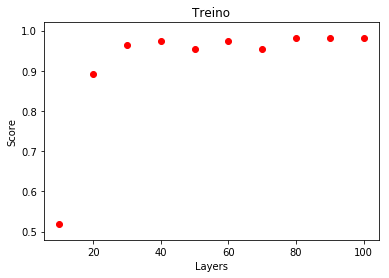

In [178]:
plt.scatter(list_var, list_Train, c='red')
plt.title("Treino")
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

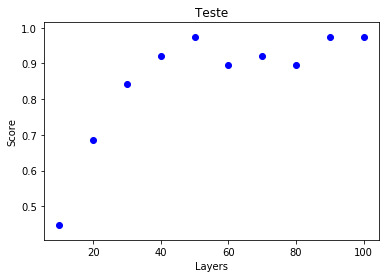

In [179]:
plt.scatter(list_var, list_Test, c='blue')
plt.title("Teste")
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

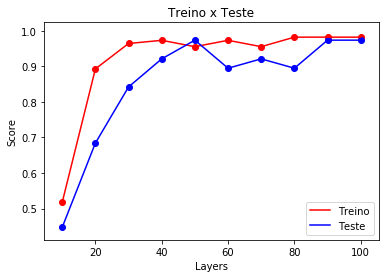

In [180]:
plt.scatter(list_var, list_Train, c='red')
plt.scatter(list_var, list_Test, c='blue')
plt.plot(list_var, list_Train, 'r-')
plt.plot(list_var, list_Test, 'b-')
plt.title("Treino x Teste")
plt.gca().legend(('Treino','Teste'))
plt.xlabel('Layers')
plt.ylabel('Score')
plt.show()

- Já com o learning_rate='adaptive' a acurácia em teste vem sempre menor que a acurácia de treino que ficam similares com um bom score com 50 Layers e se estabilizam de forma similar a partir de 90 Layers. Levando em conta o custo computacional, seria melhor optar por 50 Layers com um score em torno de 94%.

In [181]:
#-------------------------------------------------------------------------------------------------------------------------------------------

## Questão	 9. 
- Carregue os dados contidos no Dataset de Câncer (breast
cancer) do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador baseado em Redes Neurais (MLPClassifier)
para realizar a classificação dos dados carregados.
- Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25]
e [50,50] e mostre um gráfico contendo a diferença entre os scores
obtidos no conjunto de treino para cada valor do parâmetro.
- Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25],
e [50,50] e mostre um gráfico contendo a diferença entre os scores
obtidos no conjunto de teste para cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de hidden_layer_sizes.
Altere o parâmetro alpha para 0.0001, 0.001 e 0.01 e repita os
experimentos realizados mostrando os mesmos gráficos. Justifique os
resultados obtidos.

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [183]:
x,y = load_breast_cancer()['data'], load_breast_cancer()['target']

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [185]:
def plots_Alphas(alphas):
    
    for alpha in alphas:
        list_Train = []
        list_Test = []
        list_var = []
        layers = [[10,10], [25,50], [50,25], [50,50]]

        for n in range(0,4):

            mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(layers[n][0],layers[n][1]), alpha=alpha)

            mlp.fit(x_train, y_train)
            list_Train.append(mlp.score(x_train, y_train))

            mlp.fit(x_test, y_test)
            list_Test.append(mlp.score(x_test, y_test))

            list_var.append(str(layers[n]))

        plt.figure(figsize=(20, 20))
        
        plt.subplot(321)
        plt.scatter(list_var, list_Train, c='red')
        plt.title("Treino - Alpha %s" % alpha)
        plt.xlabel('Layers')
        plt.ylabel('Score')
        
        plt.subplot(322)
        plt.scatter(list_var, list_Test, c='blue')
        plt.title("Teste - Alpha %s" % alpha)
        plt.xlabel('Layers')
        plt.ylabel('Score')
        
        plt.subplot(323)
        plt.scatter(list_var, list_Train, c='red')
        plt.scatter(list_var, list_Test, c='blue')
        plt.plot(list_var, list_Train, 'r-')
        plt.plot(list_var, list_Test, 'b-')
        plt.title("Treino x Teste - Alpha %s" % alpha)
        plt.gca().legend(('Treino','Teste'))
        plt.xlabel('Layers')
        plt.ylabel('Score')
        
        plt.show()

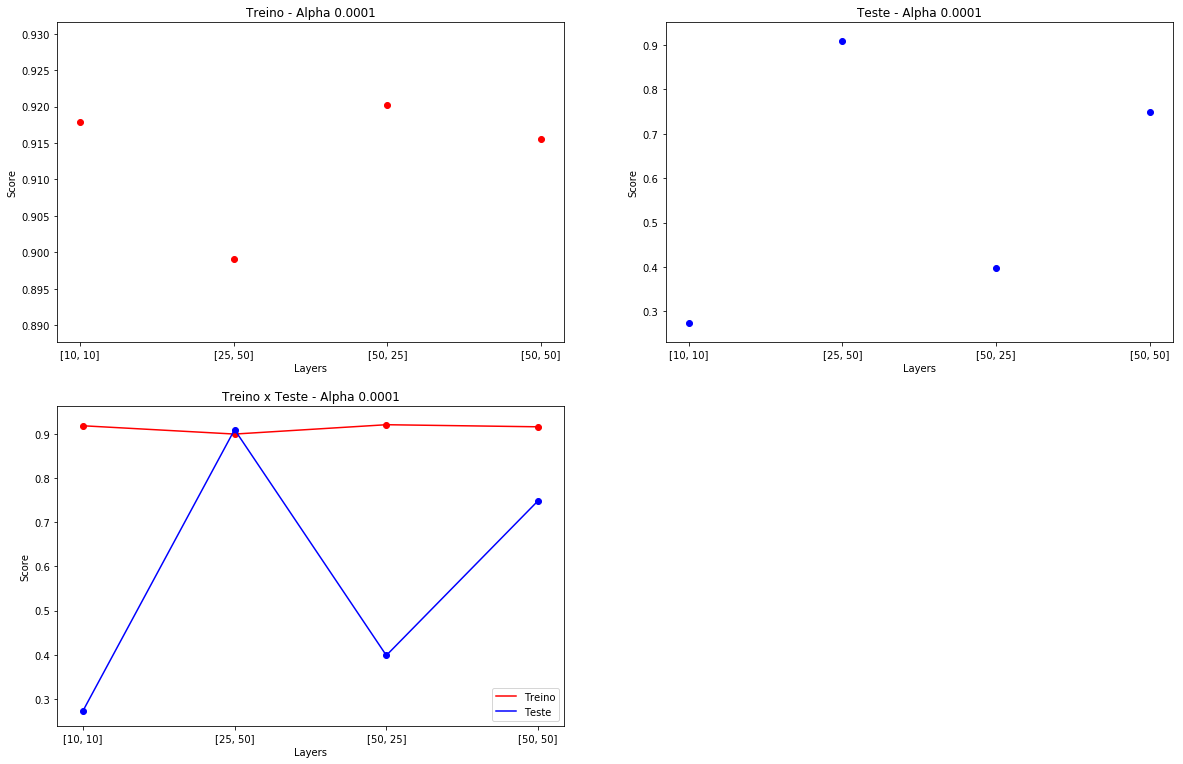

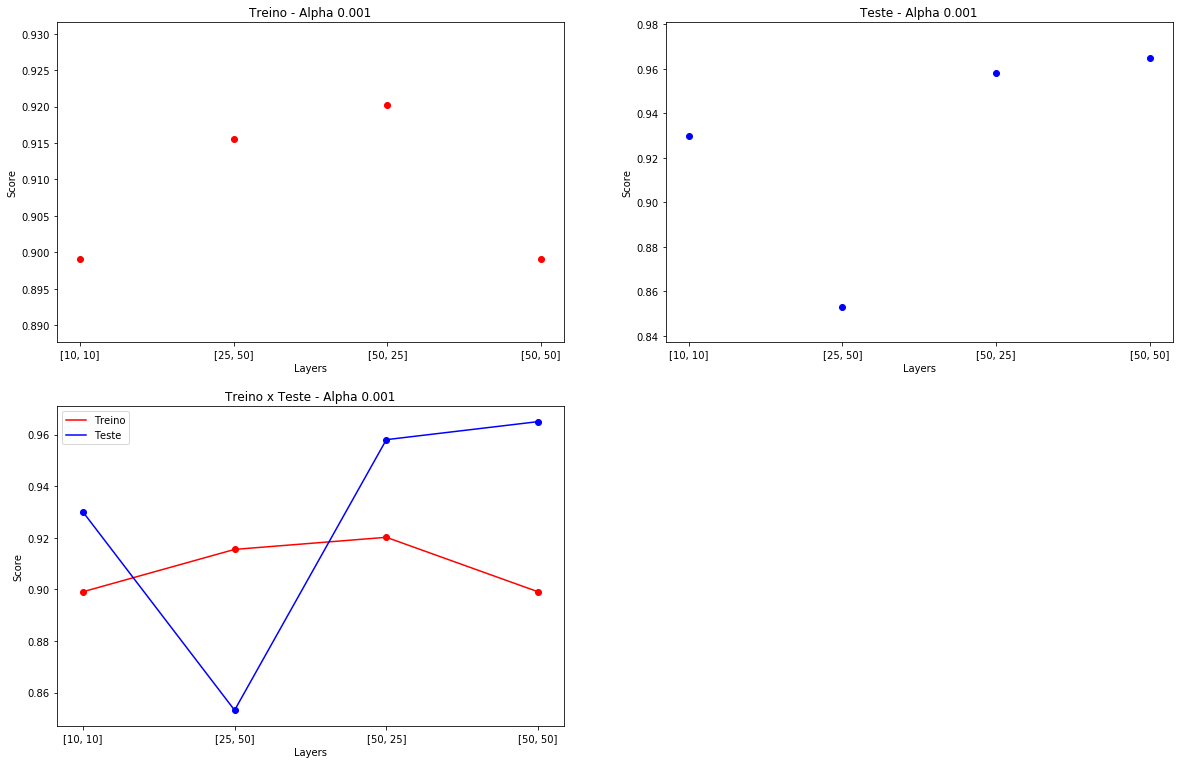

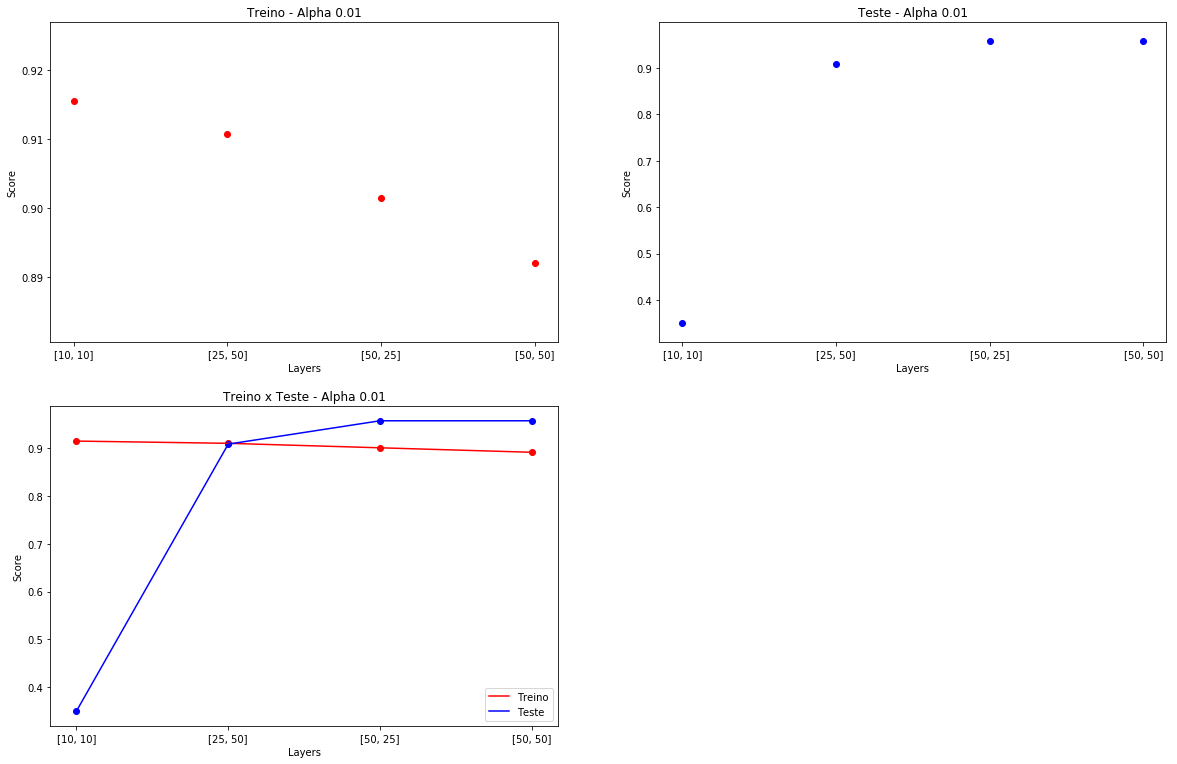

In [186]:
plots_Alphas([0.0001, 0.001, 0.01])

- Na comparação entre as Layers com o alpha padrão de 0.0001, demonstrado pelo primeiro conjunto de gráficos, as Layers [50,50] demonstraram melhor acurácia em teste, algo similar verifica-se com o alpha de 0.001, demonstrado pelo segundo conjunto de gráficos, apenas com alpha de 0.01, demonstrado pelo terceiro conjunto de gráficos, que as Layers [25,50] e [50,25] são superiores às restantes nos dados de teste.

## Questão	 10. 
- Carregue os dados contidos no Dataset de Câncer (breast
cancer) do scikit-learn.
- Utilize o modelo K-means para encontrar os grupos dos dados
carregados.
- Varie o parâmetro n_clusters para 2, 5 e 10.
- Calcule a quantidade de elementos em cada cluster para cada valor
do parâmetro n_clusters. Para obter a quantidade de elementos que
ficaram no cluster i, utilize o código km.labels_[km.labels_ ==
i].shape[0], considerando que km é a variável que contém o fit sobre
o KMeans.
Baseado nos resultados das divisões dos dados entre os cluster obtidos
na etapa anterior, justifique qual valor você escolheria para n_clusters.

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [188]:
x,y = load_breast_cancer()['data'], load_breast_cancer()['target']

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [190]:
def quantidade_Elementos_Cluster(quantidade_clusters):
    
    km = KMeans(n_clusters=quantidade_clusters)
    km.fit(x_train)
    km.predict(x_test)
    for n in range(0,quantidade_clusters):
        print('Quantidade de elementos do cluster %s:' %(n+1), km.labels_[km.labels_ == n].shape[0])

In [191]:
quantidade_Elementos_Cluster(2)

Quantidade de elementos do cluster 1: 325
Quantidade de elementos do cluster 2: 101


In [192]:
quantidade_Elementos_Cluster(5)

Quantidade de elementos do cluster 1: 59
Quantidade de elementos do cluster 2: 201
Quantidade de elementos do cluster 3: 35
Quantidade de elementos do cluster 4: 10
Quantidade de elementos do cluster 5: 121


In [193]:
quantidade_Elementos_Cluster(10)

Quantidade de elementos do cluster 1: 35
Quantidade de elementos do cluster 2: 84
Quantidade de elementos do cluster 3: 21
Quantidade de elementos do cluster 4: 6
Quantidade de elementos do cluster 5: 61
Quantidade de elementos do cluster 6: 39
Quantidade de elementos do cluster 7: 1
Quantidade de elementos do cluster 8: 31
Quantidade de elementos do cluster 9: 140
Quantidade de elementos do cluster 10: 8


- Escolheria 2 Clusters pois é onde a contagem de observações é mais homogênea entre os clusters.